<a href="https://colab.research.google.com/github/KndHvH/fanta/blob/1/FIAP/MachineLearning/GS/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Solution: Machine Learning

RM 94199 - Matias Cornelsen Herklotz

RM 93821 - Gustavo Jordão Santos

RM 94026 - Daniel Faria de Barros

In [1]:
#df
import pandas as pd

#graphs
import matplotlib.pyplot as plt
import seaborn as sns

#train test spli
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix

#scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Modelos - ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Modelos - RN
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

# Apenas para evitar warnings
import warnings
warnings.filterwarnings('ignore')


# Entendimento do problema, dos dados e análises exploratórias

In [ ]:
df = pd.read_csv("./dataset.csv")

In [ ]:
df

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,"Rs 90,36,63,001\n ~ 90 Crore+",Rs 0\n ~,427900,115,428015,28.559732,40.977823,1498666
2261,Telangana,ZAHIRABAD,BANALA LAXMA REDDY,0,BJP,Lotus,MALE,3,47.0,GENERAL,12th Pass,"Rs 5,85,77,327\n ~ 5 Crore+","Rs 52,50,000\n ~ 52 Lacs+",138731,216,138947,9.271379,13.302678,1498666


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL
CASES                            2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

### Conseguimos perceber que existiam dados faltantes, portanto eliminamos as linhas contendo esses dados:

In [ ]:
df.dropna(inplace=True)
df

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+","Rs 2,22,51,891\n ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,Maharashtra,YAVATMAL-WASHIM,Vaishali Sudhakar Yede,0,PHJSP,Whistle,FEMALE,0,28.0,GENERAL,10th Pass,"Rs 11,68,500\n ~ 11 Lacs+","Rs 9,000\n ~ 9 Thou+",20563,57,20620,1.076097,1.755157,1916185
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,"Rs 90,36,63,001\n ~ 90 Crore+",Rs 0\n ~,427900,115,428015,28.559732,40.977823,1498666


In [ ]:
df.describe()

,WINNER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
count,2018.000000,2018.000000,2.018000e+03,2018.000000,2.018000e+03,2018.000000,2018.000000,2.018000e+03
mean,0.267096,52.273538,2.911903e+05,1105.111001,2.922954e+05,17.596810,25.808492,1.660261e+06
std,0.442553,11.869373,2.545964e+05,1661.283371,2.555874e+05,14.886247,21.403985,3.164246e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,3.047625e+04,97.000000,3.074375e+04,1.953617,2.870669,1.530404e+06
50%,0.000000,52.000000,2.846300e+05,463.000000,2.855250e+05,18.036861,27.749894,1.679891e+06
75%,1.000000,61.000000,5.058620e+05,1545.500000,5.076175e+05,30.708115,44.349684,1.823404e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


In [ ]:
df.nunique()

STATE                                          36
CONSTITUENCY                                  539
NAME                                         2013
WINNER                                          2
PARTY                                         132
SYMBOL                                        126
GENDER                                          2
CRIMINAL\nCASES                                29
AGE                                            60
CATEGORY                                        3
EDUCATION                                      13
ASSETS                                       1979
LIABILITIES                                  1226
GENERAL\nVOTES                               2006
POSTAL\nVOTES                                1209
TOTAL\nVOTES                                 2010
OVER TOTAL ELECTORS \nIN CONSTITUENCY        2018
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY    2018
TOTAL ELECTORS                                542
dtype: int64

### Retirando colunas que não consideramos necessarias:
- Constituency
- State
- Symbol
- Name
- Category
- Assets
- Liabilities
- Over Total Electors in Constituency
- Over Total Votes Polled in Constituency

In [ ]:
df.drop(columns=['CONSTITUENCY',"STATE","SYMBOL","NAME","CATEGORY","ASSETS","EDUCATION","LIABILITIES","OVER TOTAL ELECTORS \nIN CONSTITUENCY","OVER TOTAL VOTES POLLED \nIN CONSTITUENCY"],inplace=True)
df

,WINNER,PARTY,GENDER,CRIMINAL\nCASES,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,TOTAL ELECTORS
0,1,BJP,MALE,52,52.0,376892,482,377374,1489790
1,0,TRS,MALE,0,54.0,318665,149,318814,1489790
2,0,INC,MALE,3,52.0,314057,181,314238,1489790
4,1,BJP,MALE,5,58.0,644459,2416,646875,1937690
5,0,BSP,MALE,0,47.0,434199,1130,435329,1937690
...,...,...,...,...,...,...,...,...,...
2257,0,PHJSP,FEMALE,0,28.0,20563,57,20620,1916185
2258,0,IND,MALE,0,43.0,14661,25,14686,1916185
2259,1,TRS,MALE,18,63.0,434066,178,434244,1498666
2260,0,INC,MALE,0,49.0,427900,115,428015,1498666


In [ ]:
df.nunique()

WINNER                2
PARTY               132
GENDER                2
CRIMINAL\nCASES      29
AGE                  60
GENERAL\nVOTES     2006
POSTAL\nVOTES      1209
TOTAL\nVOTES       2010
TOTAL ELECTORS      542
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)
df

,WINNER,PARTY,GENDER,CRIMINAL\nCASES,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,TOTAL ELECTORS
0,1,BJP,MALE,52,52.0,376892,482,377374,1489790
1,0,TRS,MALE,0,54.0,318665,149,318814,1489790
2,0,INC,MALE,3,52.0,314057,181,314238,1489790
4,1,BJP,MALE,5,58.0,644459,2416,646875,1937690
5,0,BSP,MALE,0,47.0,434199,1130,435329,1937690
...,...,...,...,...,...,...,...,...,...
2257,0,PHJSP,FEMALE,0,28.0,20563,57,20620,1916185
2258,0,IND,MALE,0,43.0,14661,25,14686,1916185
2259,1,TRS,MALE,18,63.0,434066,178,434244,1498666
2260,0,INC,MALE,0,49.0,427900,115,428015,1498666


### Percebemos que na coluna Criminal, havia dados nao disponiveis, entao tambem retiramos:

In [ ]:
df = df[df["CRIMINAL\nCASES"] != 'Not Available']
df

,WINNER,PARTY,GENDER,CRIMINAL\nCASES,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,TOTAL ELECTORS
0,1,BJP,MALE,52,52.0,376892,482,377374,1489790
1,0,TRS,MALE,0,54.0,318665,149,318814,1489790
2,0,INC,MALE,3,52.0,314057,181,314238,1489790
4,1,BJP,MALE,5,58.0,644459,2416,646875,1937690
5,0,BSP,MALE,0,47.0,434199,1130,435329,1937690
...,...,...,...,...,...,...,...,...,...
2257,0,PHJSP,FEMALE,0,28.0,20563,57,20620,1916185
2258,0,IND,MALE,0,43.0,14661,25,14686,1916185
2259,1,TRS,MALE,18,63.0,434066,178,434244,1498666
2260,0,INC,MALE,0,49.0,427900,115,428015,1498666


In [ ]:
df["CRIMINAL\nCASES"].info()

<class 'pandas.core.series.Series'>
Int64Index: 1996 entries, 0 to 2261
Series name: CRIMINAL
CASES
Non-Null Count  Dtype 
--------------  ----- 
1996 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


### O tipo da coluna Criminal, continuava como objeto, entao trocamos para tipo Int

In [ ]:
data_types_dict = {'CRIMINAL\nCASES': int}

df = df.astype(data_types_dict)

df.dtypes

WINNER               int64
PARTY               object
GENDER              object
CRIMINAL\nCASES      int32
AGE                float64
GENERAL\nVOTES       int64
POSTAL\nVOTES        int64
TOTAL\nVOTES         int64
TOTAL ELECTORS       int64
dtype: object

In [ ]:
df.describe()

,WINNER,CRIMINAL\nCASES,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,TOTAL ELECTORS
count,1996.000000,1996.000000,1996.000000,1.996000e+03,1996.000000,1.996000e+03,1.996000e+03
mean,0.270040,1.469940,52.347194,2.933312e+05,1112.224950,2.944434e+05,1.660797e+06
std,0.444091,7.677432,11.865419,2.549629e+05,1667.020546,2.559552e+05,3.174126e+05
min,0.000000,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,5.518900e+04
25%,0.000000,0.000000,44.000000,3.058475e+04,97.750000,3.077925e+04,1.530404e+06
50%,0.000000,0.000000,52.500000,2.918845e+05,470.000000,2.930290e+05,1.681608e+06
75%,1.000000,1.000000,61.000000,5.078095e+05,1549.500000,5.096195e+05,1.823664e+06
max,1.000000,240.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,3.150313e+06


# Graficos

### O primeiro grafico que fizemos, nos deu uma boa ideia de como os Labes, de winner e loser, estao bem divididos em determinadas comparações

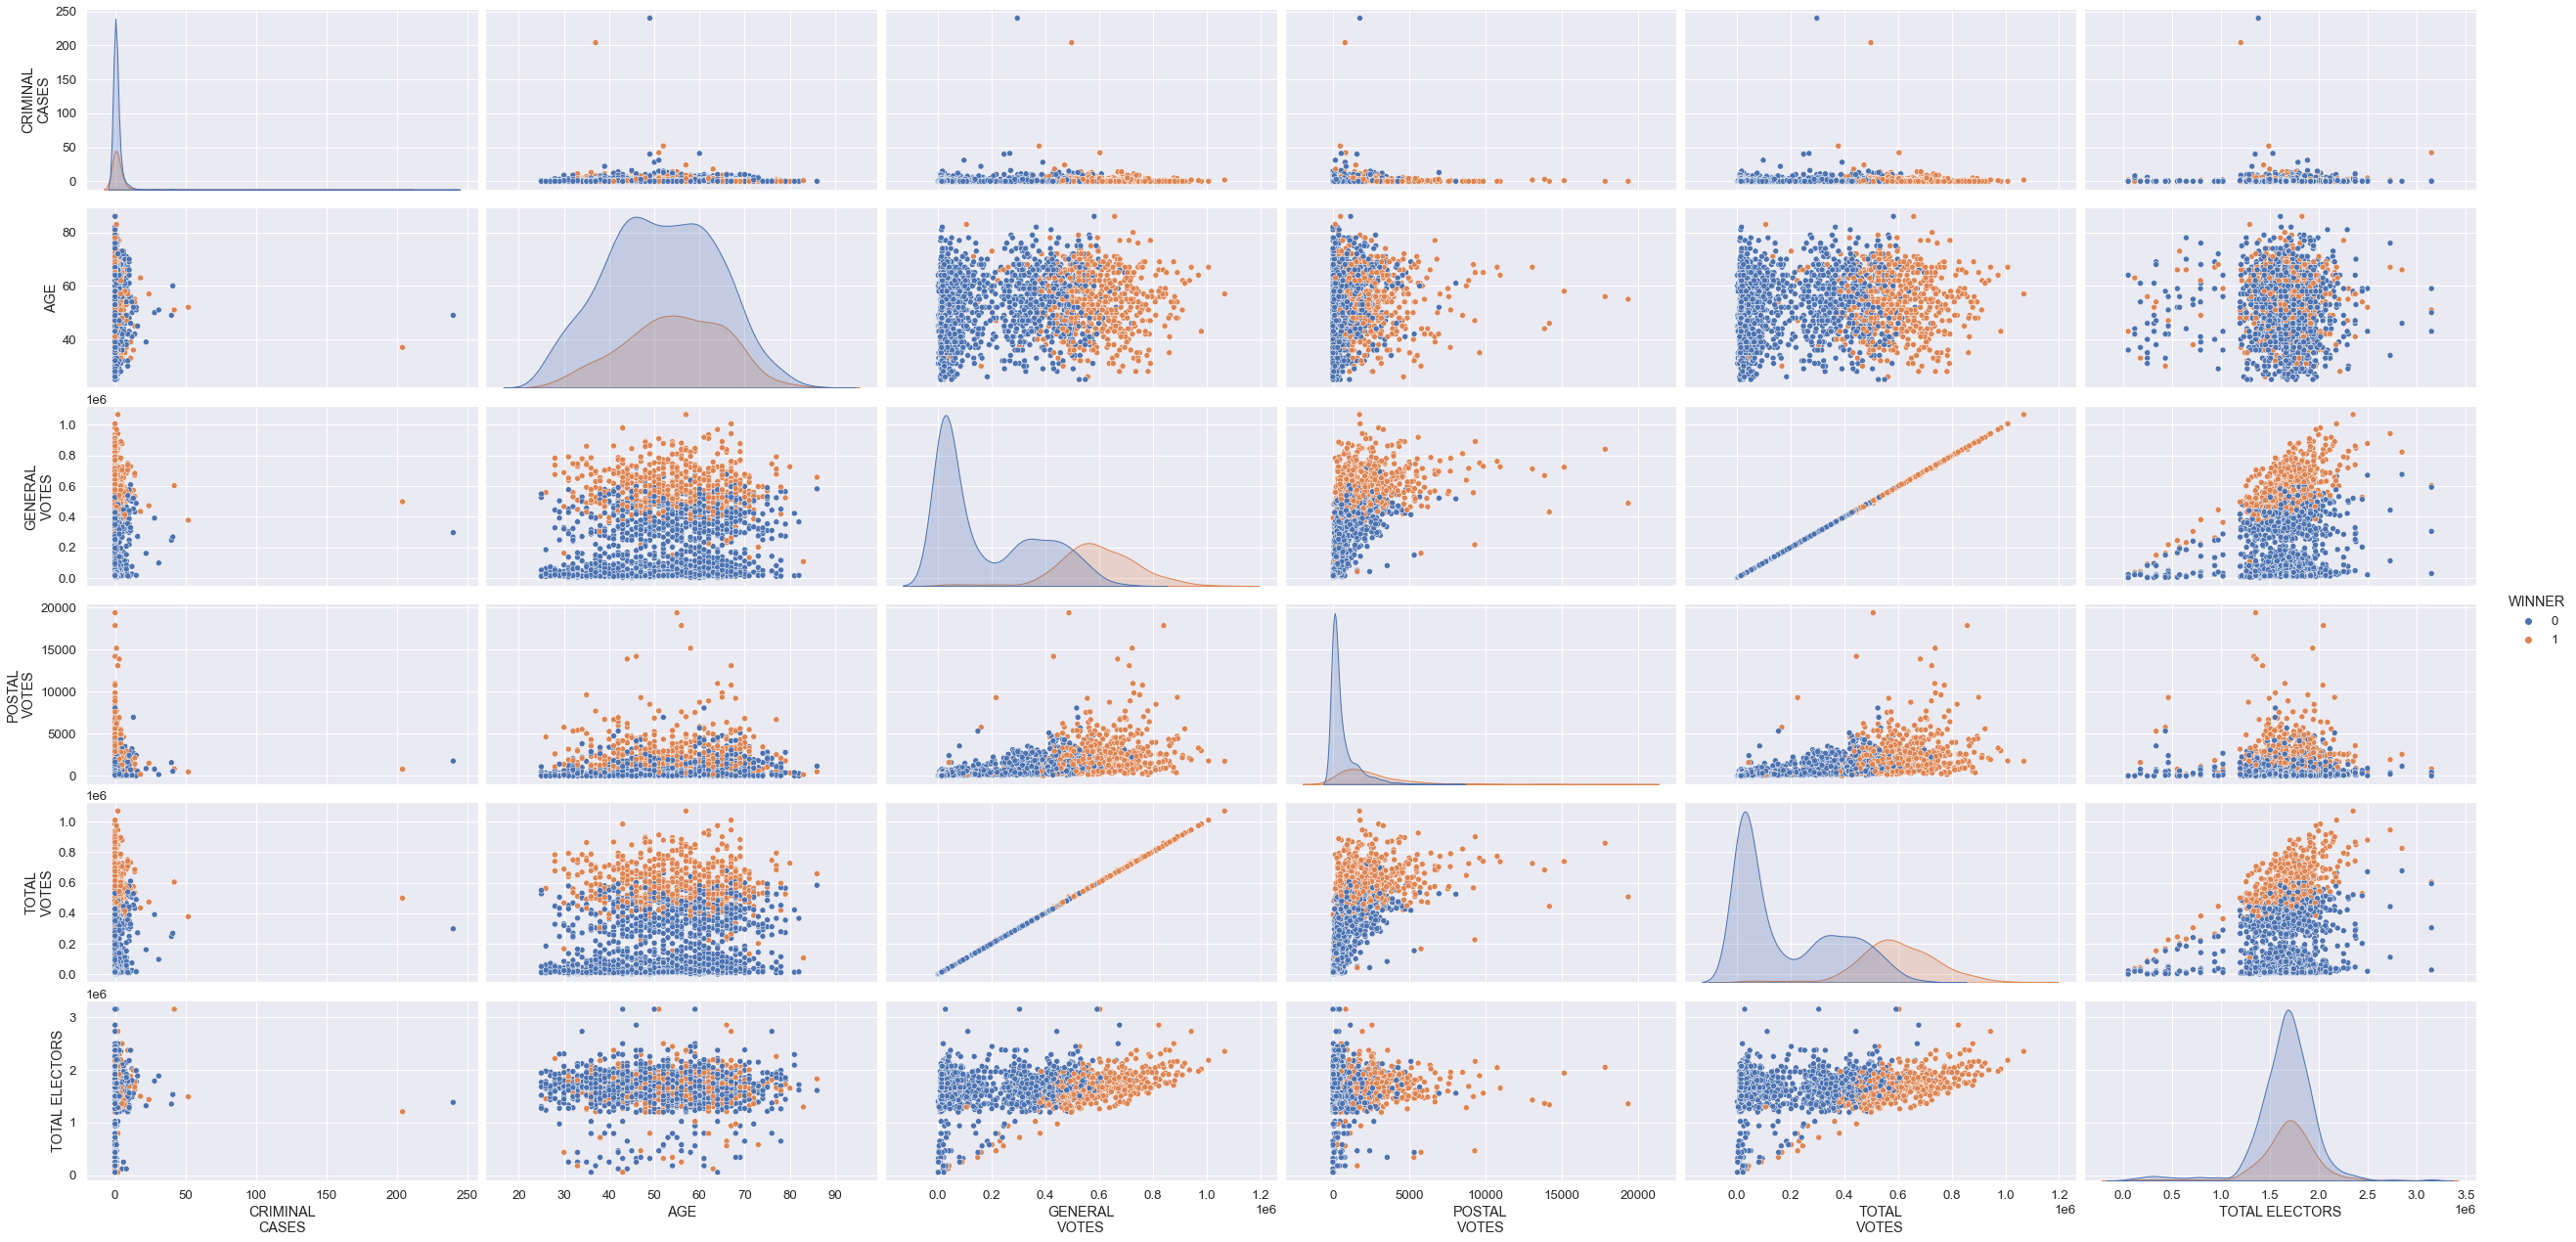

In [ ]:
sns.set(font_scale = 1.2)
sns.pairplot(df,hue='WINNER',height=3, aspect=2)

### Fizemos entao um grafico do Total de eleitores pelo Total de votos do candidato, separado por Winner ou Loser
- Concluimos que esses dois dados em geral, afetam diretamente no desempenho do candidato na eleição

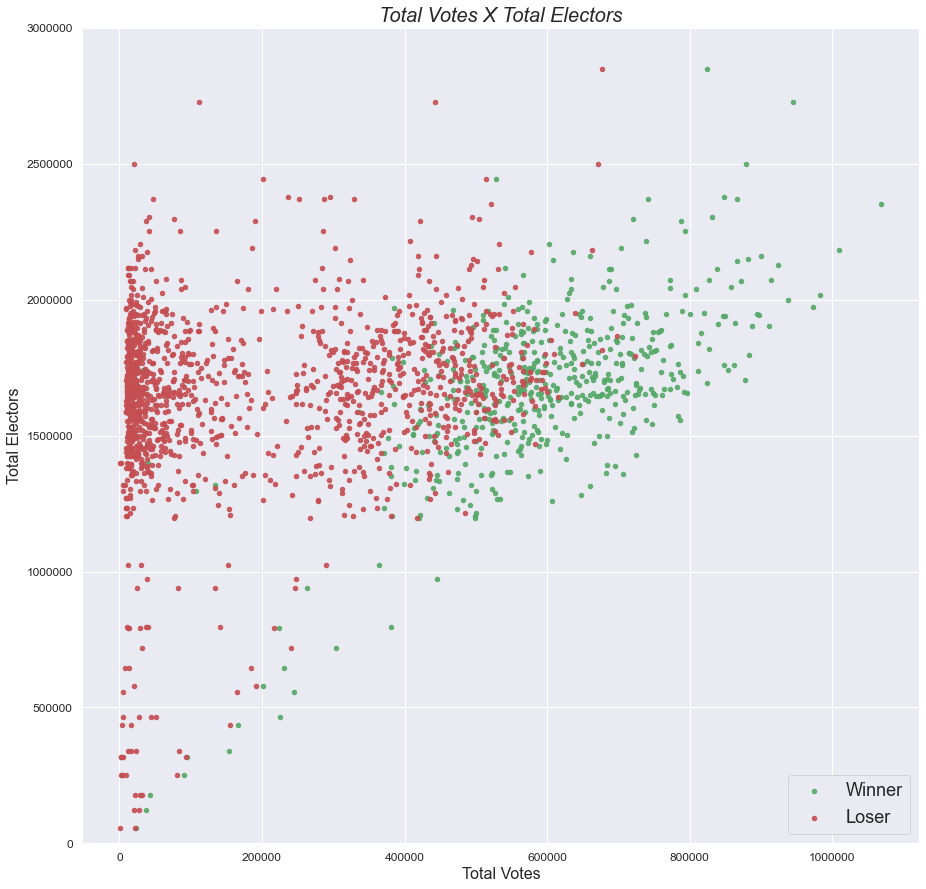

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
# ax.scatter(df["charges"], df["bmi"])
ax.set_title("Total Votes X Total Electors",
            fontsize=20, fontstyle="italic")
ax.set_ylabel("Total Electors", fontsize=16)
ax.set_xlabel("Total Votes", fontsize=16)

ax.grid(True)

# ax.set_xticks([i for i in range(0, 100000, 5000)])
ax.tick_params(axis="x", labelsize=12)
ax.ticklabel_format(style='plain')
ax.set_ylim(0, 3000000)
ax.tick_params(axis="y", labelsize=12)
ax.ticklabel_format(style='plain')


winner_votes = df[(df["WINNER"] == 1)]["TOTAL\nVOTES"]
winner_elector = df[(df["WINNER"] == 1)]["TOTAL ELECTORS"]
ax.scatter(x=winner_votes,y= winner_elector, s=20, c = "g", alpha=0.9,edgecolors="g")

loser_votes = df[(df["WINNER"] == 0)]["TOTAL\nVOTES"]
loser_elector = df[(df["WINNER"] == 0)]["TOTAL ELECTORS"]
ax.scatter(x=loser_votes,y= loser_elector, s=20, c = "r", alpha=0.9,edgecolors="r")
ax.legend(["Winner","Loser"], loc="lower right", fontsize=18)


plt.show()

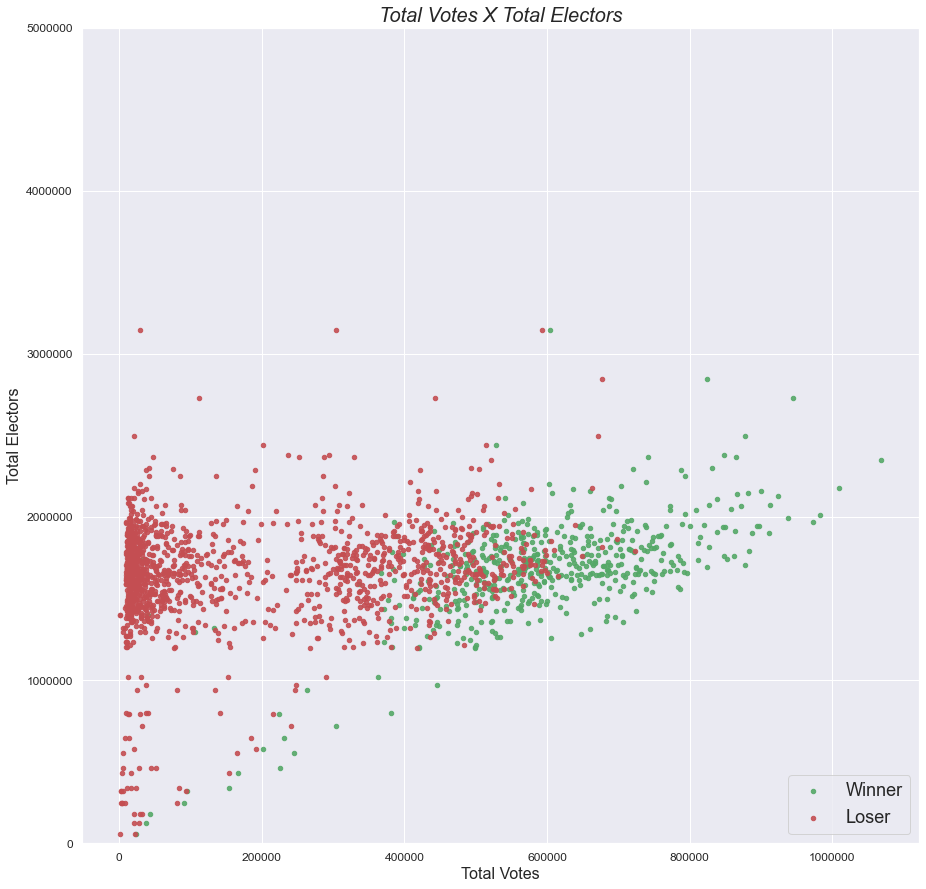

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
# ax.scatter(df["charges"], df["bmi"])
ax.set_title("Total Votes X Total Electors",
            fontsize=20, fontstyle="italic")
ax.set_ylabel("Total Electors", fontsize=16)
ax.set_xlabel("Total Votes", fontsize=16)

ax.grid(True)

# ax.set_xticks([i for i in range(0, 100000, 5000)])
ax.tick_params(axis="x", labelsize=12)
ax.ticklabel_format(style='plain')
ax.set_ylim(0,5000000)
ax.tick_params(axis="y", labelsize=12)
ax.ticklabel_format(style='plain')


winner_votes = df[(df["WINNER"] == 1)]["TOTAL\nVOTES"]
winner_elector = df[(df["WINNER"] == 1)]["TOTAL ELECTORS"]
ax.scatter(x=winner_votes,y= winner_elector, s=20, c = "g", alpha=0.9,edgecolors="g")

loser_votes = df[(df["WINNER"] == 0)]["TOTAL\nVOTES"]
loser_elector = df[(df["WINNER"] == 0)]["TOTAL ELECTORS"]
ax.scatter(x=loser_votes,y= loser_elector, s=20, c = "r", alpha=0.9,edgecolors="r")
ax.legend(["Winner","Loser"], loc="lower right", fontsize=18)


plt.show()

### Também fizemos um grafico para saber como estavam distribuidos os Labels

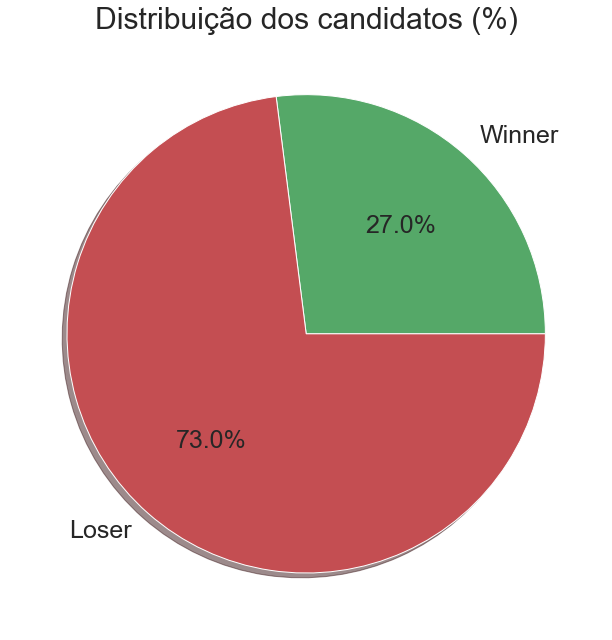

In [ ]:
winner = df[df.WINNER==1].count()
loser = df[df.WINNER==0].count()
quantidade = (winner["WINNER"],loser["WINNER"])

plt.figure(figsize=(11,11))
plt.pie(autopct="%1.1f%%",x=quantidade,labels=("Winner","Loser"),shadow=True,colors=('g','r'),textprops={'fontsize': 25})

plt.title("Distribuição dos candidatos (%)",fontsize=30)


plt.show()

### Como sabiamos que o Total de votos e o Total de eleitores afetam diretamente no resultado das eleições, criamos uma nova coluna, com a proporção dos 2 dados, em forma de porcentagem

In [ ]:
df=df.assign(PROPOR = df['TOTAL\nVOTES']/df['TOTAL ELECTORS']*100)
df

,WINNER,PARTY,GENDER,CRIMINAL\nCASES,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,TOTAL ELECTORS,PROPOR
0,1,BJP,MALE,52,52.0,376892,482,377374,1489790,25.330684
1,0,TRS,MALE,0,54.0,318665,149,318814,1489790,21.399929
2,0,INC,MALE,3,52.0,314057,181,314238,1489790,21.092771
4,1,BJP,MALE,5,58.0,644459,2416,646875,1937690,33.383823
5,0,BSP,MALE,0,47.0,434199,1130,435329,1937690,22.466390
...,...,...,...,...,...,...,...,...,...,...
2257,0,PHJSP,FEMALE,0,28.0,20563,57,20620,1916185,1.076097
2258,0,IND,MALE,0,43.0,14661,25,14686,1916185,0.766419
2259,1,TRS,MALE,18,63.0,434066,178,434244,1498666,28.975369
2260,0,INC,MALE,0,49.0,427900,115,428015,1498666,28.559732


### Em seguida criamos varios graficos alterando as condições da proporção:
- Os graficos vao separar uma parcela do DF com um determinado valor de Proporção, e comparar a quantidade de Winners e Losers

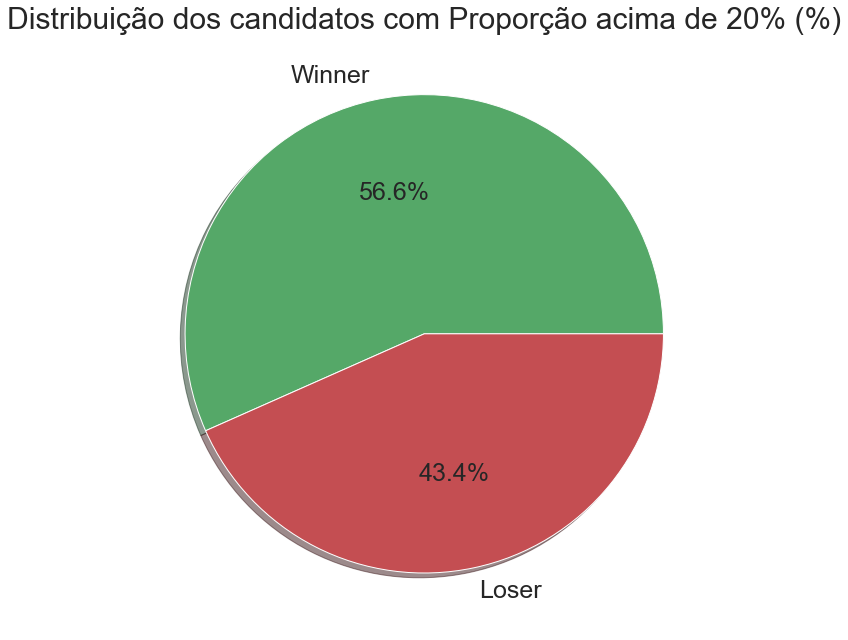

In [ ]:
df20 = df[df["PROPOR"]>= 20]
winner = df20[df20.WINNER==1].count()
loser = df20[df20.WINNER==0].count()
quantidade = (winner["PROPOR"],loser["PROPOR"])

plt.figure(figsize=(11,11))
plt.pie(autopct="%1.1f%%",x=quantidade,labels=("Winner","Loser"),shadow=True,colors=('g','r'),textprops={'fontsize': 25})

plt.title("Distribuição dos candidatos com Proporção acima de 20% (%)",fontsize=30)


plt.show()

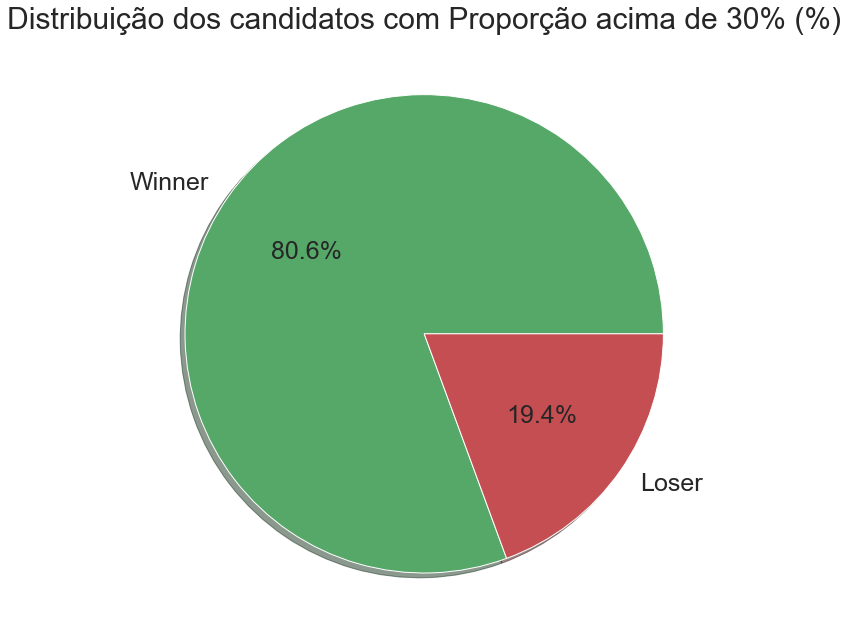

In [ ]:
df30 = df[df["PROPOR"]>= 30]
winner = df30[df30.WINNER==1].count()
loser = df30[df30.WINNER==0].count()
quantidade = (winner["PROPOR"],loser["PROPOR"])

plt.figure(figsize=(11,11))
plt.pie(autopct="%1.1f%%",x=quantidade,labels=("Winner","Loser"),shadow=True,colors=('g','r'),textprops={'fontsize': 25})

plt.title("Distribuição dos candidatos com Proporção acima de 30% (%)",fontsize=30)


plt.show()

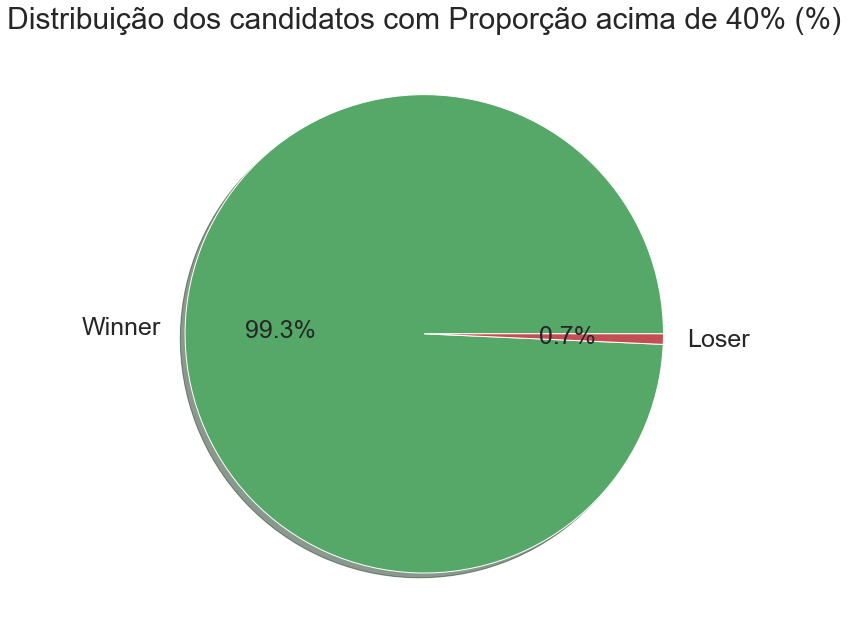

In [ ]:
df40 = df[df["PROPOR"]>= 40]
winner = df40[df40.WINNER==1].count()
loser = df40[df40.WINNER==0].count()
quantidade = (winner["PROPOR"],loser["PROPOR"])

plt.figure(figsize=(11,11))
plt.pie(autopct="%1.1f%%",x=quantidade,labels=("Winner","Loser"),shadow=True,colors=('g','r'),textprops={'fontsize': 25})

plt.title("Distribuição dos candidatos com Proporção acima de 40% (%)",fontsize=30)


plt.show()

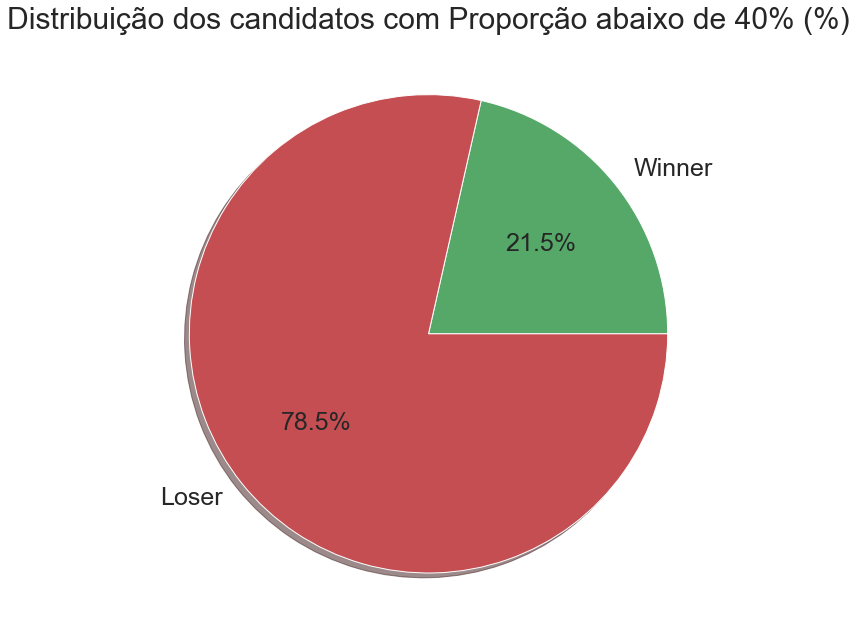

In [ ]:
df39 = df[df["PROPOR"]< 40]
winner = df39[df39.WINNER==1].count()
loser = df39[df39.WINNER==0].count()
quantidade = (winner["PROPOR"],loser["PROPOR"])

plt.figure(figsize=(11,11))
plt.pie(autopct="%1.1f%%",x=quantidade,labels=("Winner","Loser"),shadow=True,colors=('g','r'),textprops={'fontsize': 25})

plt.title("Distribuição dos candidatos com Proporção abaixo de 40% (%)",fontsize=30)


plt.show()

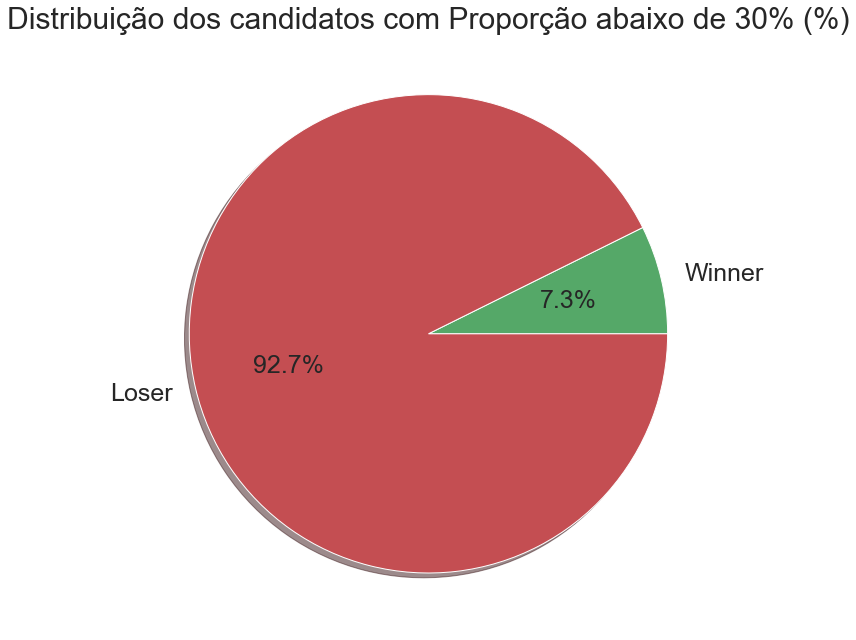

In [ ]:
df29 = df[df["PROPOR"]<= 30]
winner = df29[df29.WINNER==1].count()
loser = df29[df29.WINNER==0].count()
quantidade = (winner["PROPOR"],loser["PROPOR"])

plt.figure(figsize=(11,11))
plt.pie(autopct="%1.1f%%",x=quantidade,labels=("Winner","Loser"),shadow=True,colors=('g','r'),textprops={'fontsize': 25})

plt.title("Distribuição dos candidatos com Proporção abaixo de 30% (%)",fontsize=30)


plt.show()

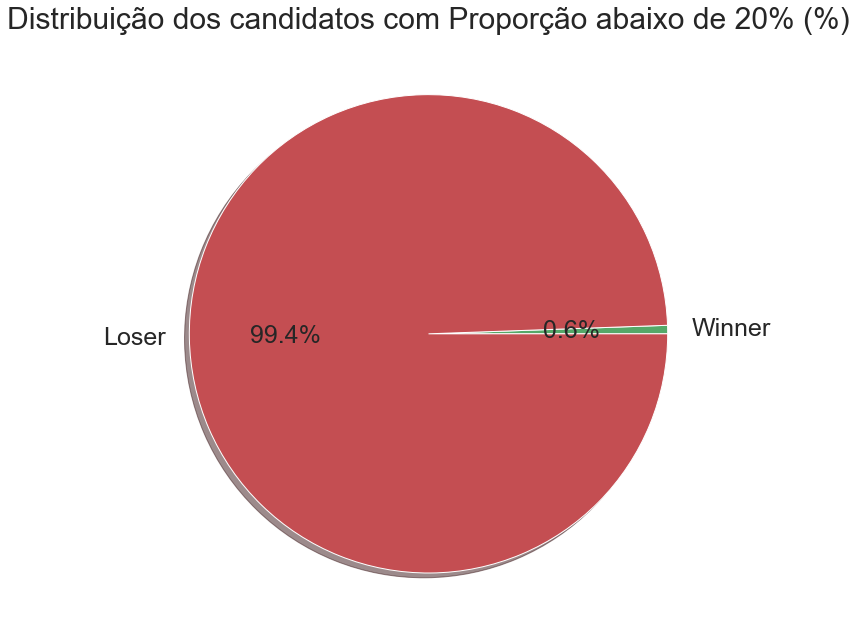

In [ ]:
df19= df[df["PROPOR"]<= 20]
winner = df19[df19.WINNER==1].count()
loser = df19[df19.WINNER==0].count()
quantidade = (winner["PROPOR"],loser["PROPOR"])

plt.figure(figsize=(11,11))
plt.pie(autopct="%1.1f%%",x=quantidade,labels=("Winner","Loser"),shadow=True,colors=('g','r'),textprops={'fontsize': 25})

plt.title("Distribuição dos candidatos com Proporção abaixo de 20% (%)",fontsize=30)


plt.show()

### Concluimos que;
- A proporção vai facilitar bastante a previsao de uma inteligencia, pois se a proporção de um candidato for abaixo de 20%, é quase certeza que o candidato perdeu, e se for acima de 40%, é quase certeza que o candidato ganhou!
- As caracteristicas de Winner e Loser sao bem distintas, proporcionando um possivel alto desempenho de uma maquina treinada com esses dados

# Modelagem preditiva: este candidato ganharia a eleição?

### Transformando os dados do tipo Objeto em tipo Int

In [ ]:
df

,WINNER,PARTY,GENDER,CRIMINAL\nCASES,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,TOTAL ELECTORS,PROPOR
0,1,BJP,MALE,52,52.0,376892,482,377374,1489790,25.330684
1,0,TRS,MALE,0,54.0,318665,149,318814,1489790,21.399929
2,0,INC,MALE,3,52.0,314057,181,314238,1489790,21.092771
4,1,BJP,MALE,5,58.0,644459,2416,646875,1937690,33.383823
5,0,BSP,MALE,0,47.0,434199,1130,435329,1937690,22.466390
...,...,...,...,...,...,...,...,...,...,...
2257,0,PHJSP,FEMALE,0,28.0,20563,57,20620,1916185,1.076097
2258,0,IND,MALE,0,43.0,14661,25,14686,1916185,0.766419
2259,1,TRS,MALE,18,63.0,434066,178,434244,1498666,28.975369
2260,0,INC,MALE,0,49.0,427900,115,428015,1498666,28.559732


In [ ]:
dic = {
    "MALE": 1,
    "FEMALE": 0
}


def funcao(x):
    return dic[x]


df["GENDER"] = df["GENDER"].apply(funcao)
df

,WINNER,PARTY,GENDER,CRIMINAL\nCASES,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,TOTAL ELECTORS,PROPOR
0,1,BJP,1,52,52.0,376892,482,377374,1489790,25.330684
1,0,TRS,1,0,54.0,318665,149,318814,1489790,21.399929
2,0,INC,1,3,52.0,314057,181,314238,1489790,21.092771
4,1,BJP,1,5,58.0,644459,2416,646875,1937690,33.383823
5,0,BSP,1,0,47.0,434199,1130,435329,1937690,22.466390
...,...,...,...,...,...,...,...,...,...,...
2257,0,PHJSP,0,0,28.0,20563,57,20620,1916185,1.076097
2258,0,IND,1,0,43.0,14661,25,14686,1916185,0.766419
2259,1,TRS,1,18,63.0,434066,178,434244,1498666,28.975369
2260,0,INC,1,0,49.0,427900,115,428015,1498666,28.559732


### Criando dummies para a coluna PARTY

In [ ]:
dummies = pd.get_dummies(df['PARTY'])
dummies

,AAM,AAP,ABGP,ABSKP,ADAL,AGP,AHFBK,AHNP,AIADMK,AIFB,...,VBA,VCK,VCSMP,VPI,VSIP,WAP,WPOI,YKP,YSRCP,ravp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat( [df, dummies], axis=1 )
df

,WINNER,PARTY,GENDER,CRIMINAL\nCASES,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,TOTAL ELECTORS,PROPOR,...,VBA,VCK,VCSMP,VPI,VSIP,WAP,WPOI,YKP,YSRCP,ravp
0,1,BJP,1,52,52.0,376892,482,377374,1489790,25.330684,...,0,0,0,0,0,0,0,0,0,0
1,0,TRS,1,0,54.0,318665,149,318814,1489790,21.399929,...,0,0,0,0,0,0,0,0,0,0
2,0,INC,1,3,52.0,314057,181,314238,1489790,21.092771,...,0,0,0,0,0,0,0,0,0,0
4,1,BJP,1,5,58.0,644459,2416,646875,1937690,33.383823,...,0,0,0,0,0,0,0,0,0,0
5,0,BSP,1,0,47.0,434199,1130,435329,1937690,22.466390,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,0,PHJSP,0,0,28.0,20563,57,20620,1916185,1.076097,...,0,0,0,0,0,0,0,0,0,0
2258,0,IND,1,0,43.0,14661,25,14686,1916185,0.766419,...,0,0,0,0,0,0,0,0,0,0
2259,1,TRS,1,18,63.0,434066,178,434244,1498666,28.975369,...,0,0,0,0,0,0,0,0,0,0
2260,0,INC,1,0,49.0,427900,115,428015,1498666,28.559732,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop(columns=['PARTY'],inplace=True)
df

,WINNER,GENDER,CRIMINAL\nCASES,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,TOTAL ELECTORS,PROPOR,AAM,...,VBA,VCK,VCSMP,VPI,VSIP,WAP,WPOI,YKP,YSRCP,ravp
0,1,1,52,52.0,376892,482,377374,1489790,25.330684,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,54.0,318665,149,318814,1489790,21.399929,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,3,52.0,314057,181,314238,1489790,21.092771,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,5,58.0,644459,2416,646875,1937690,33.383823,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,47.0,434199,1130,435329,1937690,22.466390,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,0,0,0,28.0,20563,57,20620,1916185,1.076097,0,...,0,0,0,0,0,0,0,0,0,0
2258,0,1,0,43.0,14661,25,14686,1916185,0.766419,0,...,0,0,0,0,0,0,0,0,0,0
2259,1,1,18,63.0,434066,178,434244,1498666,28.975369,0,...,0,0,0,0,0,0,0,0,0,0
2260,0,1,0,49.0,427900,115,428015,1498666,28.559732,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.dtypes

WINNER               int64
GENDER               int64
CRIMINAL\nCASES      int32
AGE                float64
GENERAL\nVOTES       int64
                    ...   
WAP                  uint8
WPOI                 uint8
YKP                  uint8
YSRCP                uint8
ravp                 uint8
Length: 141, dtype: object

### Separando os dados em treino e teste

In [ ]:
X = df.drop(columns=["WINNER"])
Y = df['WINNER']

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=42)

### Definindo a funcao para calcular as metricas

In [ ]:
def metrics(y_test,y_pred):

    acc = accuracy_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    pre = precision_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    print(f"Accuracy: {acc:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"Precision: {pre:.2f}")
    print(f"\033[92m\033[1mF1_score: {f1:.2f}\033[0m")

### Modelo ML-1: Tree

In [ ]:
def tree(X_train,X_test,y_train,y_test):
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    metrics(y_test,y_pred)

In [ ]:
tree(X_train,X_test,y_train,y_test)

Accuracy: 0.88
Recall: 0.76
Precision: 0.79
F1_score: 0.77


### Modelo ML-2: Forest

In [ ]:
def forest(X_train,X_test,y_train,y_test,i):
    floresta = RandomForestClassifier(n_estimators=i)
    floresta.fit(X_train, y_train)
    y_pred = floresta.predict(X_test)
    metrics(y_test,y_pred)


In [ ]:
for i in range(1,100,10):
    print(f"\033[91mEstimators: {i}\033[0m")
    forest(X_train,X_test,y_train,y_test,i)
    print("\n")

Estimators: 1
Accuracy: 0.87
Recall: 0.72
Precision: 0.78
F1_score: 0.75


Estimators: 11
Accuracy: 0.91
Recall: 0.80
Precision: 0.86
F1_score: 0.83


Estimators: 21
Accuracy: 0.93
Recall: 0.84
Precision: 0.89
F1_score: 0.87


Estimators: 31
Accuracy: 0.93
Recall: 0.84
Precision: 0.88
F1_score: 0.86


Estimators: 41
Accuracy: 0.92
Recall: 0.81
Precision: 0.90
F1_score: 0.85


Estimators: 51
Accuracy: 0.92
Recall: 0.84
Precision: 0.86
F1_score: 0.85


Estimators: 61
Accuracy: 0.93
Recall: 0.84
Precision: 0.89
F1_score: 0.87


Estimators: 71
Accuracy: 0.92
Recall: 0.82
Precision: 0.87
F1_score: 0.85


Estimators: 81
Accuracy: 0.92
Recall: 0.81
Precision: 0.86
F1_score: 0.84


Estimators: 91
Accuracy: 0.93
Recall: 0.83
Precision: 0.88
F1_score: 0.86




### Modelo ML-3: KNN

In [ ]:
def knn(X_train, X_test, y_train, y_test, k=0):
    if k == 0:
        k = int( (len(y_train) + len(y_test)) ** 0.5 )

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    metrics(y_test,y_pred)

In [ ]:
for i in range(0,51,5):
    print(f"\033[91mk: {i}\033[0m")
    knn(X_train,X_test,y_train,y_test,i)
    print("\n")

k: 0
Accuracy: 0.88
Recall: 0.73
Precision: 0.79
F1_score: 0.76


k: 5
Accuracy: 0.88
Recall: 0.75
Precision: 0.80
F1_score: 0.78


k: 10
Accuracy: 0.87
Recall: 0.69
Precision: 0.81
F1_score: 0.74


k: 15
Accuracy: 0.87
Recall: 0.71
Precision: 0.79
F1_score: 0.75


k: 20
Accuracy: 0.86
Recall: 0.70
Precision: 0.78
F1_score: 0.74


k: 25
Accuracy: 0.86
Recall: 0.72
Precision: 0.76
F1_score: 0.74


k: 30
Accuracy: 0.87
Recall: 0.71
Precision: 0.79
F1_score: 0.75


k: 35
Accuracy: 0.86
Recall: 0.72
Precision: 0.76
F1_score: 0.74


k: 40
Accuracy: 0.86
Recall: 0.70
Precision: 0.77
F1_score: 0.73


k: 45
Accuracy: 0.87
Recall: 0.74
Precision: 0.78
F1_score: 0.76


k: 50
Accuracy: 0.88
Recall: 0.73
Precision: 0.79
F1_score: 0.76




### Modelo ML-3.1: KNN com os dados escalados

In [ ]:
minmax = MinMaxScaler()

X_train_scaled = minmax.fit_transform(X_train)

X_test_scaled = minmax.transform(X_test)

In [ ]:
for i in range(0,51,5):
    print(f"\033[91mk: {i}\033[0m")
    knn(X_train_scaled,X_test_scaled,y_train,y_test,i)
    print("\n")

k: 0
Accuracy: 0.90
Recall: 0.75
Precision: 0.87
F1_score: 0.81


k: 5
Accuracy: 0.91
Recall: 0.78
Precision: 0.87
F1_score: 0.82


k: 10
Accuracy: 0.91
Recall: 0.74
Precision: 0.92
F1_score: 0.82


k: 15
Accuracy: 0.92
Recall: 0.79
Precision: 0.90
F1_score: 0.84


k: 20
Accuracy: 0.92
Recall: 0.77
Precision: 0.92
F1_score: 0.84


k: 25
Accuracy: 0.91
Recall: 0.76
Precision: 0.90
F1_score: 0.82


k: 30
Accuracy: 0.92
Recall: 0.76
Precision: 0.93
F1_score: 0.84


k: 35
Accuracy: 0.91
Recall: 0.75
Precision: 0.91
F1_score: 0.82


k: 40
Accuracy: 0.91
Recall: 0.77
Precision: 0.89
F1_score: 0.83


k: 45
Accuracy: 0.91
Recall: 0.79
Precision: 0.87
F1_score: 0.83


k: 50
Accuracy: 0.91
Recall: 0.78
Precision: 0.87
F1_score: 0.82




### Modelo RN-1: Perceptron

In [ ]:
def perceptron(X_train,X_test,y_train,y_test):
    perceptron = Perceptron(random_state=22)
    perceptron.fit(X_train, y_train)
    y_pred = perceptron.predict(X_test)
    metrics(y_test,y_pred)
    plot_confusion_matrix(perceptron, X_test, y_test, cmap="Greens")

Accuracy: 0.89
Recall: 0.76
Precision: 0.80
F1_score: 0.78


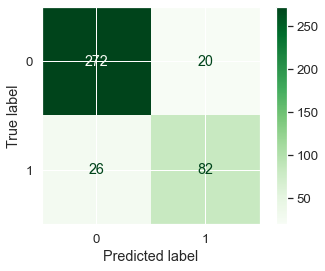

In [ ]:
perceptron(X_train,X_test,y_train,y_test)

### Modelo RN-2: MLP

In [ ]:
def mlp1(X_train,X_test,y_train,y_test):
    mlp = MLPClassifier(hidden_layer_sizes=(i,),
                   random_state=1,
                   max_iter=50)

    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    metrics(y_test,y_pred)
    plot_confusion_matrix(mlp, X_test, y_test, cmap="Greens")

Accuracy: 0.89
Recall: 0.76
Precision: 0.81
F1_score: 0.78


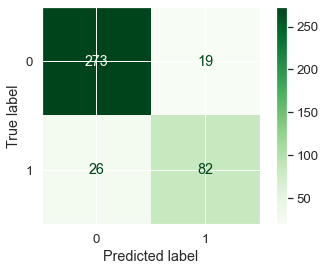

In [ ]:
mlp1(X_train,X_test,y_train,y_test)

### Modelo RN-3: MLP

In [ ]:
def mlp2(X_train,X_test,y_train,y_test):
    mlp = MLPClassifier(hidden_layer_sizes=(1,),
                   random_state=1,
                   activation="logistic",
                   solver="adam",
                   learning_rate="adaptive",
                   max_iter=500)

    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    plot_confusion_matrix(mlp, X_test, y_test, cmap="Greens")
    metrics(y_test,y_pred)

Accuracy: 0.94
Recall: 0.87
Precision: 0.89
F1_score: 0.88


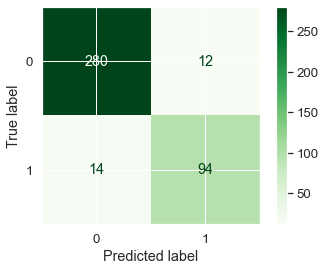

In [ ]:
mlp2(X_train_scaled,X_test_scaled,y_train,y_test)